<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Подпункт-1.1" data-toc-modified-id="Подпункт-1.1-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Подпункт 1.1</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

### Подпункт 1.1

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, roc_curve
from sklearn.dummy import DummyClassifier
from sklearn.utils import shuffle

In [2]:
# откроем фаил и сораним в переменную df
df = pd.read_csv('/datasets/Churn.csv')

In [3]:
# выведем первые пять строк
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
# выведем основую информацию о датасете 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
# приведем к змеиному регистру наши названия столбцов
df = df.rename(columns = {'RowNumber':'row_number', 'CustomerId':'customer_id', 'CreditScore':'credit_score',
       'NumOfProducts':'num_of_products', 'HasCrCard':'has_cr_card',
       'IsActiveMember':'is_active_member', 'EstimatedSalary':'estimated_salary'})
df.columns = df.columns.str.lower()

*Есть около тысячи строк с пропущенными значениями Tenure - какое количество лет являлся клиентом банка*

In [6]:
df.loc[df['tenure'].isnull()].head()

,row_number,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0


In [7]:
# заменим пропуски на 0, предположив, что это новые клиенты банка
df['tenure'] = df['tenure'].fillna(0)

In [8]:
# проверим дубликаты
df.duplicated().sum()

0

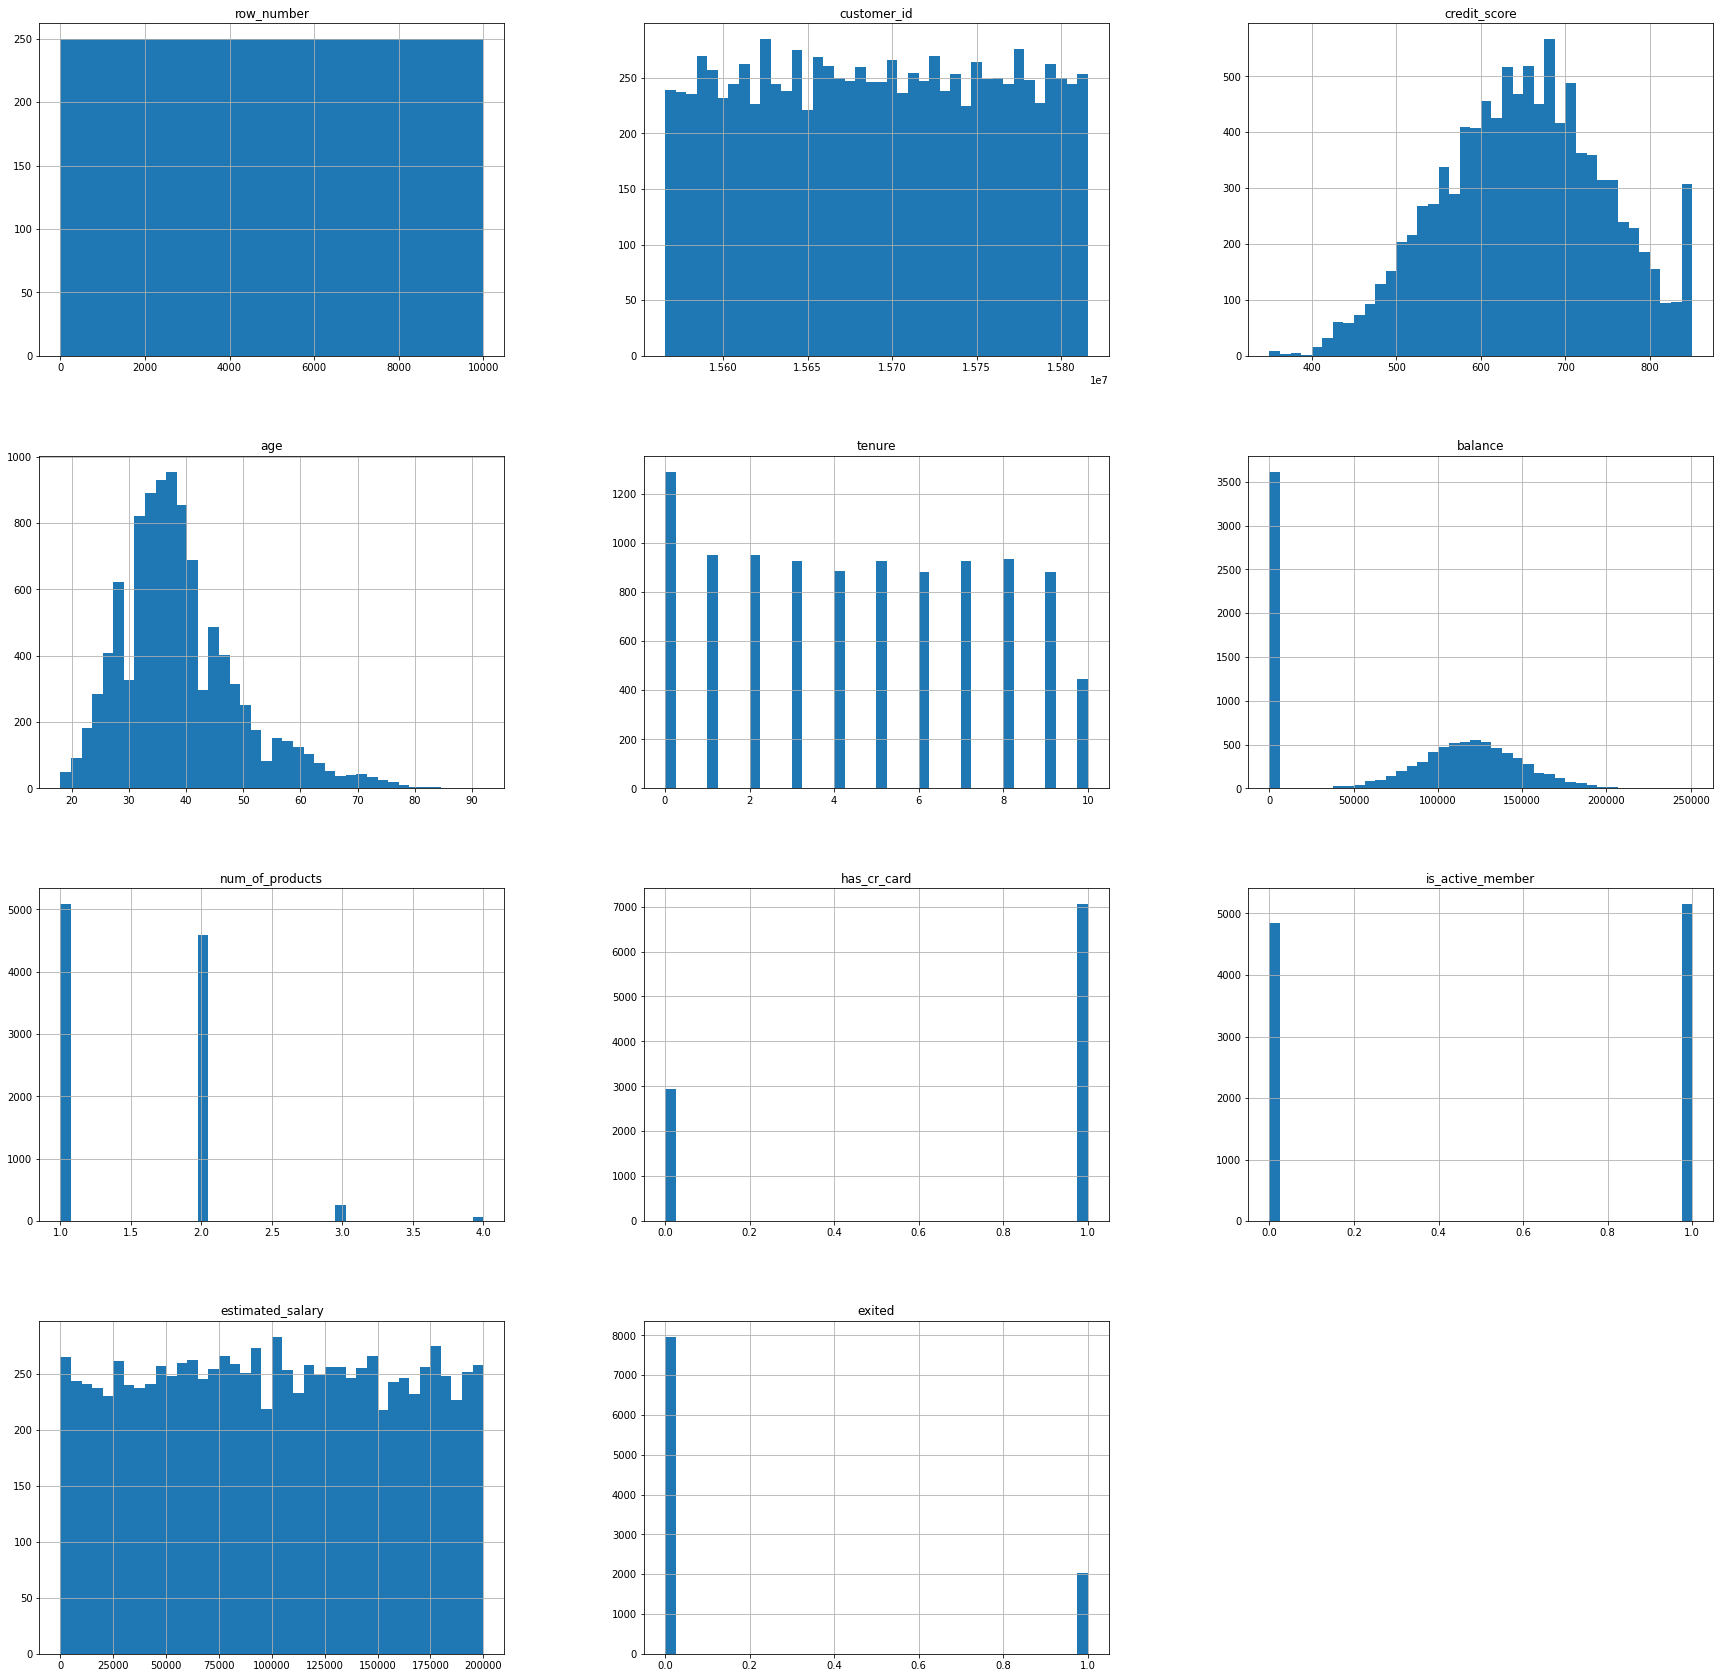

In [9]:
# посмотрим как распределяются наши данные по всему датасету
df.hist(figsize=(30, 30), bins=40)
plt.show()

*Исходя из наших данных можно удалить следующие стоблбцы row_number, customer_id, surname, т.к. исходя из логики они в себе не несут никакой полезной нагрузки, для пердсказания нашего целевого признака*

In [10]:
df.drop(['row_number', 'customer_id', 'surname'], axis=1, inplace=True)

In [11]:
df[['credit_score', 'geography', 'gender', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']].corr()

,credit_score,age,tenure,balance,num_of_products,estimated_salary
credit_score,1.000000,-0.003965,0.003087,0.006268,0.012238,-0.001384
age,-0.003965,1.000000,-0.007368,0.028308,-0.030680,-0.007201
tenure,0.003087,-0.007368,1.000000,-0.005821,0.010106,0.011225
balance,0.006268,0.028308,-0.005821,1.000000,-0.304180,0.012797
num_of_products,0.012238,-0.030680,0.010106,-0.304180,1.000000,0.014204
estimated_salary,-0.001384,-0.007201,0.011225,0.012797,0.014204,1.000000


In [12]:
# проверим все наши преобразования
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   geography         10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  float64
 5   balance           10000 non-null  float64
 6   num_of_products   10000 non-null  int64  
 7   has_cr_card       10000 non-null  int64  
 8   is_active_member  10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  exited            10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


Выделим из нашего датафрейма целевой признак от остальных признаков

In [13]:
# наш целевой признак
target = df['exited']
# остальные признаки
features = df.drop(['exited'], axis=1)

In [14]:
# разделим наши данные на три части - тренировочную, тестовую и проверочную в следующей пропорции 3:1:1
features_train, features_check, target_train, target_check = \
train_test_split(features, target, test_size=0.4, random_state=12345)

In [15]:
features_test, features_valid, target_test, target_valid = \
train_test_split(features_check, target_check, test_size=0.5, random_state=12345)

In [16]:
# проверим, правильно ли мы произвели разделение по проции 3:1:1
display(features_train.shape, features_test.shape, features_valid.shape)

(6000, 10)

(2000, 10)

(2000, 10)

*Как видим, мы успешно разделили датасет отведя 60% на тренировочные данные и по 20% оставили на тестовые и проверочные.*

Для коррекной работы моделей выполним преобразование категориальных данных методом OHE

In [17]:
features_train = pd.get_dummies(features_train, drop_first=True)
features_test = pd.get_dummies(features_test, drop_first=True)
features_valid = pd.get_dummies(features_valid, drop_first=True)

In [18]:
print(features_train.shape, features_test.shape)

(6000, 11) (2000, 11)


*Мы преобразовали наши данные, проверили на соответствие данных и их типы, произвели преобразование методом OHE, заполнинили пропуски и удалили не нужные столбцы. Данные подготовлены можем приступать к обучению моделей.*

## Исследование задачи

In [18]:
target.value_counts(normalize=True)

0    0.7963
1    0.2037
Name: exited, dtype: float64

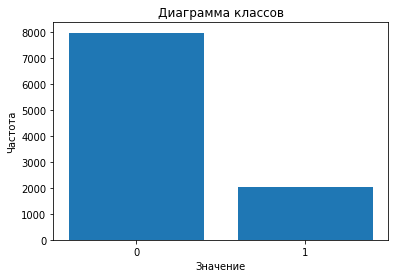

In [19]:
plt.bar(['0', '1'], target.value_counts())
plt.title('Диаграмма классов')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.show()

*У нас в данных присутствует дисбаланс классов, соотношение классов 1 к 4, в пользу 0-го класса, необходимо будет применить upsampling, либо downsampling для получение более лучших показателей метрики и работы модели в целом.*

Приведем к общему масштабу наши признаки

In [20]:
# перечеслим стоббцы по которым нужно превести к одному масштабу
numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products',
           'estimated_salary']

In [21]:
# cоздадим объект scaler и настроим его на обучающих данных
scaler = StandardScaler()
scaler.fit(features_train[numeric])

StandardScaler()

In [22]:
# для обозначения признаков с масштабом создадим копию полей 
features_train_scaled = features_train.copy()
features_valid_scaled = features_valid.copy()
features_test_scaled = features_test.copy()

In [23]:
# применим масштабирование
features_train_scaled[numeric] = scaler.transform(features_train[numeric])
features_valid_scaled[numeric] = scaler.transform(features_valid[numeric])
features_test_scaled[numeric] = scaler.transform(features_test[numeric])

In [24]:
# проверим как теперь в "масштабе" выглядит наш датафрейм
features_train_scaled.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
7479,-0.886751,-0.373192,1.104696,1.232271,-0.891560,1,0,-0.187705,0,1,1
3411,0.608663,-0.183385,1.104696,0.600563,-0.891560,0,0,-0.333945,0,0,0
6027,2.052152,0.480939,-0.503694,1.027098,0.830152,0,1,1.503095,1,0,1
1247,-1.457915,-1.417129,0.461340,-1.233163,0.830152,1,0,-1.071061,0,0,1
3716,0.130961,-1.132419,-0.825373,1.140475,-0.891560,0,0,1.524268,1,0,0


Ниже проведем обучение двух моделей без учета дисбаланса классов

In [30]:
model_tree_imba = DecisionTreeClassifier(random_state=12345)
# обучим модель на тренеровочных данных
model_tree_imba.fit(features_train_scaled, target_train)

DecisionTreeClassifier(random_state=12345)

In [31]:
# предскажем целевой признак на валидных признаках
predicted_valid_model_tree_imba = model_tree_imba.predict(features_valid_scaled)

In [32]:
# посчитаем метрику F1
f1_score(predicted_valid_model_tree_imba, target_valid)

0.4788391777509069

In [33]:
# посчитаем accuracy выборках train и valid
display('Accuracy на обучающей выборке:', \
        model_tree_imba.score(features_train_scaled, target_train), \
        'Accuracy на валидной выборке:', \
        model_tree_imba.score(features_valid_scaled, target_valid))

'Accuracy на обучающей выборке:'

1.0

'Accuracy на валидной выборке:'

0.7845

In [34]:
# посчитаем метрику AUC-ROC
roc_auc_score(target_valid, \
              model_tree_imba.predict_proba(features_valid_scaled)[:, 1])

0.6687286660640321

*Для модели решающего дерева мы получили значения F1 меры равной 0.48, так же были рассчитына метрика accuracy почти 0.78, метрика AUC-ROC равна 0.67.*

Перейдем к модели случайного леса без учета дисбаланса классов

In [35]:
model_r_forest_imba = RandomForestClassifier(random_state=12345)
# обучим модель на тренировочных данных
model_r_forest_imba.fit(features_train_scaled, target_train)

RandomForestClassifier(random_state=12345)

In [36]:
# предскажем целевой признак на валидных признаках
predicted_valid_model_r_forest_imba = \
model_r_forest_imba.predict(features_valid_scaled)

In [37]:
# посчитаем метрику F1
f1_score(predicted_valid_model_r_forest_imba, target_valid)

0.536144578313253

In [38]:
# посчитаем accuracy выборках train и valid
display('Accuracy на обучающей выборке:', \
        model_r_forest_imba.score(features_train_scaled, target_train), \
        'Accuracy на валидной выборке:', \
        model_r_forest_imba.score(features_valid_scaled, target_valid))

'Accuracy на обучающей выборке:'

0.9998333333333334

'Accuracy на валидной выборке:'

0.846

In [39]:
# посчитаем метрику AUC-ROC
roc_auc_score(target_valid, \
              model_r_forest_imba.predict_proba(features_valid_scaled)[:, 1])

0.8513141779510727

*Как и ожидалось модель случайного леса показала лучшие метрики без настроек гипперпараметров (для частоты исследования гипперпараметры во всех моделях оставили не настроенными) мы получили значения F1 меры равной 0.54, что уже близко к значению задачи, так же были рассчитына метрика accuracy почти 0.85, метрика AUC-ROC равна 0.85 что является хорошим показателям, можно сделать вывод, что модель более точно находит правильные ответы, чем две другие модели.*

Проведем проверку моделей на адекватность

In [40]:
# создадим модель DummyClassifier 
model_dummy = DummyClassifier(random_state=1234)
# обучим нашу модель на тренеровояных данных
model_dummy.fit(features_train_scaled, target_train)
# предскажем целевой признак на валидных признаках
predicted_valid_model_dummy = model_dummy.predict(features_valid_scaled)

In [41]:
# посчитаем качество для модели DummyClassifier
model_dummy.score(features_valid_scaled, target_valid)

0.7885

In [42]:
# посчитаем метрику AUC-ROC
roc_auc_score(target_valid, \
              model_dummy.predict_proba(features_valid_scaled)[:, 1])

0.5

*Мы провели исследование трех моделей с учетом дисбаланса классов, так же провели оценку адекватности моделей, по ней можно сделать вывод, что метрики у модели случайного дерева хуже всех остальных моделей и сопоставимы с Dummy моделью , исходя из всех оценок лучшая модель это модель случайного леса у нее лучшие показатели F1 меры 0.54 и точности 0.85 и метрика метрика AUC-ROC равна 0.85.*

## Борьба с дисбалансом

Для устранения дисбаланса попробуем три метода:
- upsampling
- downsampling
- class weight  у моделей решающего дерева и случайного леса

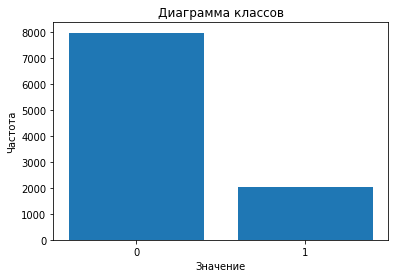

In [43]:
# еще раз посмотрим наши классы и их баланс
plt.bar(['0', '1'], target.value_counts())
plt.title('Диаграмма классов')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.show()

С помощью метода Upsampling увеличим класс 1 в четыре раза написав соответствующую функцию

In [44]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    target_zeros = target[target == 0]
    features_ones = features[target == 1]
    target_ones = target[target == 1]
    features_upsampled = shuffle((pd.concat([features_zeros] + [features_ones] * repeat)), random_state=12345)
    target_upsampled = shuffle((pd.concat([target_zeros] + [target_ones] * repeat)), random_state=12345)
    return features_upsampled, target_upsampled

In [45]:
# применим нашу функцию upsample
features_upsample, target_upsample = \
upsample(features_train_scaled, target_train, 4)

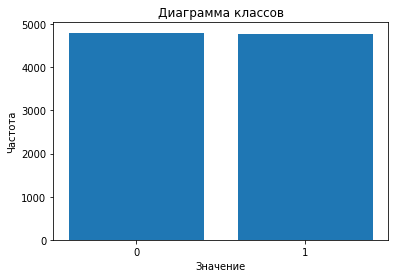

In [46]:
# проверим как работает наша функция upsample
plt.bar(['0', '1'], target_upsample.value_counts())
plt.title('Диаграмма классов')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.show()

С помощью метода Downsampling уменьшим класс 0 в четыре раза написав соответствующую функцию

In [47]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    target_zeros = target[target == 0]
    features_ones = features[target == 1]
    target_ones = target[target == 1]
    features_downsampled = shuffle((pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + \
                                            [features_ones])), random_state=12345)
    target_downsampled = shuffle((pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + \
                                          [target_ones])), random_state=12345)
    return features_downsampled, target_downsampled

In [48]:
# применим нашу функцию downsample
features_downsample, target_downsample = \
downsample(features_train_scaled, target_train, 0.25)

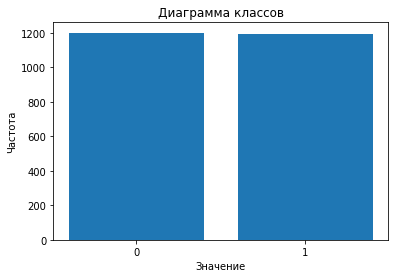

In [49]:
# проверим как работает наша функция downsample
plt.bar(['0', '1'], target_downsample.value_counts())
plt.title('Диаграмма классов')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.show()

*Ниже обучим наши модели с учетом дисбаланса классов*

Обучим Dummy модель для оценки адекватности моделей с учетом дисбаланса классов

In [50]:
# для сравнения наших моделях начнем с Dummy модели на upsampled данных
model_dummy_balance_upsmpl = DummyClassifier(random_state=1234)
# обучим нашу модель на тренеровочных данных
model_dummy_balance_upsmpl.fit(features_upsample, target_upsample)
# предскажем целевой признак на валидных признаках
predicted_valid_model_dummy_balance_upsmpl = \
model_dummy_balance_upsmpl.predict(features_valid_scaled)

In [51]:
# посчитаем качество для модели DummyClassifier на upsampled данных
model_dummy_balance_upsmpl.score(predicted_valid_model_dummy_balance_upsmpl, \
                                 target_valid)

0.7885

In [52]:
# посчитаем метрику AUC-ROC
roc_auc_score(target_valid, \
              model_dummy_balance_upsmpl.predict_proba(features_valid_scaled)[:, 1])

0.5

In [53]:
# для сравнения наших моделях начнем с Dummy модели на downsampled данных
model_dummy_balance_downsmpl = DummyClassifier(random_state=1234)
# обучим нашу модель на тренеровочных данных
model_dummy_balance_downsmpl.fit(features_downsample, target_downsample)
# предскажем целевой признак на валидных признаках
predicted_valid_model_dummy_balance_downsmpl = model_dummy_balance_downsmpl.predict(features_valid_scaled)

In [54]:
# посчитаем качество для модели DummyClassifier на downsampled данных
model_dummy_balance_downsmpl.score(predicted_valid_model_dummy_balance_downsmpl, \
                                   target_valid)

0.7885

In [55]:
# посчитаем метрику AUC-ROC
roc_auc_score(target_valid, \
              model_dummy_balance_downsmpl.predict_proba(features_valid_scaled)[:, 1])

0.5

*Dummy модель показывает точность 0.79 как на upsampled данных, так и на downsampled данных, при учете дисбаланса классов, метрика AUC-ROC равна 0.5 как при upsampled, так и при downsampled*

Модели древа решений

In [71]:
# модель древа решений на upsampled данных
model_tree_balance_upsmpl = DecisionTreeClassifier(random_state=12345)
# обучим модель на тренировочных данных
model_tree_balance_upsmpl.fit(features_upsample, target_upsample)

DecisionTreeClassifier(random_state=12345)

In [72]:
# предскажем целевой признак на валидных признаках
predicted_valid_model_tree_balance_upsmpl = model_tree_balance_upsmpl.predict(features_valid_scaled)

In [73]:
# посчитаем метрику F1
f1_score(predicted_valid_model_tree_balance_upsmpl, target_valid)

0.4957264957264958

In [74]:
# посчитаем accuracy выборках train и valid
display('Accuracy на обучающей выборке:', model_tree_balance_upsmpl.score(features_upsample, target_upsample), \
        'Accuracy на валидной выборке:', model_tree_balance_upsmpl.score(features_valid_scaled, target_valid))

'Accuracy на обучающей выборке:'

1.0

'Accuracy на валидной выборке:'

0.7935

In [75]:
# посчитаем метрику AUC-ROC
roc_auc_score(target_valid, \
              model_tree_balance_upsmpl.predict_proba(features_valid_scaled)[:, 1])

0.6787605817071947

In [76]:
# модель древа решений на downsampled данных
model_tree_balance_downsmpl = DecisionTreeClassifier(random_state=12345)
# обучим модель на тренировочных данных
model_tree_balance_downsmpl.fit(features_downsample, target_downsample)

DecisionTreeClassifier(random_state=12345)

In [77]:
# предскажем целевой признак на валидных признаках
predicted_valid_model_tree_balance_downsmpl = model_tree_balance_downsmpl.predict(features_valid_scaled)

In [78]:
# посчитаем метрику F1
f1_score(predicted_valid_model_tree_balance_downsmpl, target_valid)

0.49128919860627185

In [79]:
# посчитаем accuracy выборках train и valid
display('Accuracy на обучающей выборке:', model_tree_balance_downsmpl.score(features_downsample, target_downsample), \
        'Accuracy на валидной выборке:', model_tree_balance_downsmpl.score(features_valid_scaled, target_valid))

'Accuracy на обучающей выборке:'

1.0

'Accuracy на валидной выборке:'

0.708

In [80]:
# посчитаем метрику AUC-ROC
roc_auc_score(target_valid, \
              model_tree_balance_downsmpl.predict_proba(features_valid_scaled)[:, 1])

0.6928767702388502

In [81]:
# модель древа решений с учетом аргумента class_weight, встроенной в параметры модели
model_tree_balance_class_weight = DecisionTreeClassifier(random_state=12345, class_weight='balanced')
# обучим модель на тренировочных данных
model_tree_balance_class_weight.fit(features_train_scaled, target_train)

DecisionTreeClassifier(class_weight='balanced', random_state=12345)

In [82]:
# предскажем целевой признак на валидных признаках
predicted_valid_model_tree_balance_class_weight = model_tree_balance_class_weight.predict(features_valid_scaled)

In [83]:
# посчитаем метрику F1
f1_score(predicted_valid_model_tree_balance_class_weight, target_valid)

0.4839506172839506

In [84]:
# посчитаем accuracy выборках train и valid
display('Accuracy на обучающей выборке:', model_tree_balance_class_weight.score(features_train_scaled, target_train), \
        'Accuracy на валидной выборке:', model_tree_balance_class_weight.score(features_valid_scaled, target_valid))

'Accuracy на обучающей выборке:'

1.0

'Accuracy на валидной выборке:'

0.791

In [85]:
# посчитаем метрику AUC-ROC
roc_auc_score(target_valid, \
              model_tree_balance_class_weight.predict_proba(features_valid_scaled)[:, 1])

0.671120465437712

*Из полученных данных видим, что модель древа решений показала лучшую F1 меру при upsampling'e, чем остальные методы балансировки классов. Так же отметим, что при учете дисбаланса классов, F1 мера увеличилась с 0.48 до 0.5, и выросла точность с 0.78 до 0.79, метрика AUC-ROC при downsamplin показала значение 0.69, что немного выше чем 0.67 при дисбалансе классов*

Модели случайного леса

In [86]:
# модель случайного леса на upsampled данных
model_r_forest_balance_upsmpl = RandomForestClassifier(random_state=12345)
# обучим модель на тренировочных данных
model_r_forest_balance_upsmpl.fit(features_upsample, target_upsample)

RandomForestClassifier(random_state=12345)

In [87]:
# предскажем целевой признак на валидных признаках
predicted_valid_model_r_forest_balance_upsmpl = model_r_forest_balance_upsmpl.predict(features_valid_scaled)

In [88]:
# посчитаем метрику F1
f1_score(predicted_valid_model_r_forest_balance_upsmpl, target_valid)

0.5816733067729083

In [89]:
# посчитаем accuracy выборках train и valid
display('Accuracy на обучающей выборке:', model_r_forest_balance_upsmpl.score(features_upsample, target_upsample), \
        'Accuracy на валидной выборке:', model_r_forest_balance_upsmpl.score(features_valid_scaled, target_valid))

'Accuracy на обучающей выборке:'

1.0

'Accuracy на валидной выборке:'

0.8425

In [90]:
# посчитаем метрику AUC-ROC
roc_auc_score(target_valid, \
              model_r_forest_balance_upsmpl.predict_proba(features_valid_scaled)[:, 1])

0.8495452508053866

In [91]:
# модель случайного леса на downsampled данных
model_r_forest_balance_downsmpl = RandomForestClassifier(random_state=12345)
# обучим модель на тренировочных данных
model_r_forest_balance_downsmpl.fit(features_downsample, target_downsample)

RandomForestClassifier(random_state=12345)

In [92]:
# предскажем целевой признак на валидных признаках
predicted_valid_model_r_forest_balance_downsmpl = model_r_forest_balance_downsmpl.predict(features_valid_scaled)

In [93]:
# посчитаем метрику F1
f1_score(predicted_valid_model_r_forest_balance_downsmpl, target_valid)

0.584870848708487

In [94]:
# посчитаем accuracy выборках train и valid
display('Accuracy на обучающей выборке:', model_r_forest_balance_downsmpl.score(features_downsample, target_downsample), \
        'Accuracy на валидной выборке:', model_r_forest_balance_downsmpl.score(features_valid_scaled, target_valid))

'Accuracy на обучающей выборке:'

1.0

'Accuracy на валидной выборке:'

0.775

In [95]:
# посчитаем метрику AUC-ROC
roc_auc_score(target_valid, \
              model_r_forest_balance_downsmpl.predict_proba(features_valid_scaled)[:, 1])

0.8450247424936776

In [96]:
# модель случайного леса с учетом аргумента class_weight, встроенной в параметры модели
model_r_forest_balance_class_weight = RandomForestClassifier(random_state=12345, class_weight='balanced')
# обучим модель на тренировочных данных
model_r_forest_balance_class_weight.fit(features_train_scaled, target_train)

RandomForestClassifier(class_weight='balanced', random_state=12345)

In [97]:
# предскажем целевой признак на валидных признаках
predicted_valid_model_r_forest_balance_class_weight = model_r_forest_balance_class_weight.predict(features_valid_scaled)

In [98]:
# посчитаем метрику F1
f1_score(predicted_valid_model_r_forest_balance_class_weight, target_valid)

0.5146379044684128

In [99]:
# посчитаем accuracy выборках train и valid
display('Accuracy на обучающей выборке:', \
        model_r_forest_balance_class_weight.score(features_train_scaled, target_train), \
        'Accuracy на валидной выборке:', \
        model_r_forest_balance_class_weight.score(features_valid_scaled, target_valid))

'Accuracy на обучающей выборке:'

1.0

'Accuracy на валидной выборке:'

0.8425

In [100]:
# посчитаем метрику AUC-ROC
roc_auc_score(target_valid, \
              model_r_forest_balance_class_weight.predict_proba(features_valid_scaled)[:, 1])

0.8548347926982286

*Из полученных данных видим, что при downsampling'ге данных, мы получили лучшие метрики, чем встроенный в параметры модели случайного леса. Так же отметим, что при учете дисбаланса классов, F1 мера увеличилась с 0.54 до 0.59, точность немного упала с 0.85 до 0.76, метрика AUC-ROC не изменилась с учетом дисбаланса классов и равна 0.85*

Лучшие метрики показала модель случайного леса обученная на upsamplig'e признаках, возьмем ее для подбора гипперпараметров, для получения еще более лучших метрик качества модели.

In [101]:
best_model_r_forest = None
best_f1 = 0
best_result_r_forest = 0

for est in range(10, 251, 10):
    for value in range(1, 25, 5):
        # задаем модель с параметрами которые будем подбирать
        train_model_r_forest = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=value, \
                                                    min_samples_split=value+1, min_samples_leaf=value)
        train_model_r_forest.fit(features_upsample, target_upsample) # обучаем модель
        predicted_valid_train_model_r_forest = train_model_r_forest.predict(features_valid_scaled)
        f1 = f1_score(predicted_valid_train_model_r_forest, target_valid) # считаем F1 меру модели
        valid_result_r_forest = train_model_r_forest.score(features_valid_scaled, target_valid) # считаем качество модели
        if f1 > best_f1: # выбираем лучшие метрики
            best_model_r_forest = train_model_r_forest
            best_result_r_forest = valid_result_r_forest
            best_f1 = f1

In [102]:
display('Лучшая модель случайного леса:', best_model_r_forest, \
        'Лучшая F1 мера:', best_f1, \
        'Accuracy лучшей модели случайного леса:', best_result_r_forest)

'Лучшая модель случайного леса:'

RandomForestClassifier(max_depth=11, min_samples_leaf=11, min_samples_split=12,
                       n_estimators=190, random_state=12345)

'Лучшая F1 мера:'

0.615859938208033

'Accuracy лучшей модели случайного леса:'

0.8135

Подведем итог наших исследований:
- не все модели прошли тест на адекватность, по метрике точности у Dummy модели 0.79.
- модели показали более лучшие метрики F1 меры, по сравнению с моделями, где не был учтен дисбаланс классов
- немного снизилась метрика точности у моделей логистической регресси и древа решений, а модели случайного леса осталась примерно на том же уровне
- с помощью перебора гиппер параметров были найдены лучшие гиппер параметры для модели случайного леса, где удалось достичь F1 меры равной 0.62 

## Тестирование модели

In [103]:
# модель случайного леса с лучшими гипперпараметрами
model = RandomForestClassifier(max_depth=11, min_samples_leaf=11, min_samples_split=12,
                       n_estimators=190, random_state=12345)

In [104]:
# обучим нашу лучшую модель
model.fit(features_upsample, target_upsample)

RandomForestClassifier(max_depth=11, min_samples_leaf=11, min_samples_split=12,
                       n_estimators=190, random_state=12345)

In [105]:
# получим предсказания
predicted_test = model.predict(features_test_scaled)

In [106]:
# посчитаем F1 метрику
f1_score(predicted_test, target_test)

0.6225026288117771

In [107]:
# посчитаем accuracy
model.score(features_test_scaled, target_test)

0.8205

*При тестировании наша лучшая модель случайного леса показала, примерно такие же метрики как и на валидационных данных, нам на тестовых данных удалось достичь занчения F1 меры не менее 0.62, а точносности 0.82, можно поитожить, что наша модель выполняет условие поставленной задачи.*

Исследуем метрику AUC-ROC

In [108]:
# посчитаем метрику AUC-ROC
roc_auc_score(target_test, model.predict_proba(features_test_scaled)[:, 1])

0.8549909568773099

In [109]:
# вычислим вероятность классов методом predict_proba
probabilities_valid = model.predict_proba(features_test_scaled)

In [110]:
# выберем вероятности 1-го класса
probabilities_one_test = probabilities_valid[:, 1]

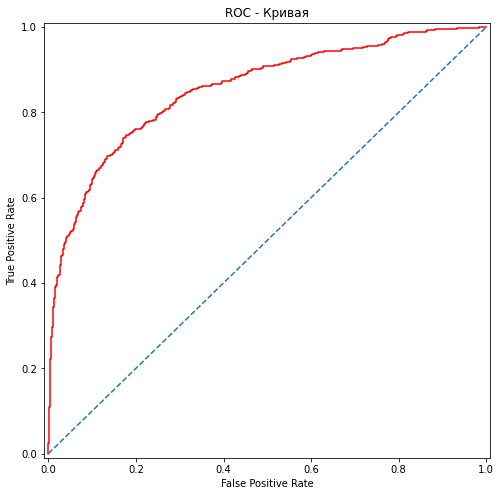

In [111]:
# построим ROC-кривую
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
plt.figure(figsize=(8, 8))

plt.plot(fpr, tpr,  color='red')

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC - Кривая')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.show()

Общий вывод:
- Мы провели подготовку данных: удалили лишние данные, заполнили пропуски, преоброзавали не числовые данные методом OHE в числовые, произвели масштабирование признаков
- Провели исследование дисбаланса классов
- Обучили модели логистической регресии, древа решений и случайного леса без учета дисбаланса классов и получены и проанализированы их метрики
- С помощью методов Upsampling и Downsampling, а так же встроенными параметрами моделей Class_weight устранили дисбаланс классов и обучили модели с учетом дисбаланса калассов и получили их метрики, в целом из-за устранения дисбаласа классов удалось качественно увеличить F1 меру для всех моделей
- Модели были оценены на адекватность, путем сравнения метрики accuracy с Dummy моделью, модели показали лучшую точность, о чем свидетельствует, что наши модели более точнее делают предсказания, нежели случайная простая модель
- Была выбрана лучшая модель исходя из ее метрик качества, модель случайного леса с F1 мерой равной 0.62
- К лучшей модели случайного леса были подобраны оптимальные гипперпараметры, для получения еще более лучших метрик качества модели
- Лучшая модель случайного леса была протестирована на тестовых данных с оптимальными гипперпараметрами, была получена F1 мера равная 0.62, что являлось ключевым фактором решение задачи
- Была рассчитана метрика AUC-ROC для лучшей модели случайного леса, равная 0.86 и построена ROC-кривая

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*